In [57]:
import numpy as np
from mp_api.client import MPRester
from pymatgen.core.operations import SymmOp
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.phonon.plotter import PhononBSPlotter
from jupyter_jsmol.pymatgen import quick_view
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import matplotlib.pyplot as plt
from pymatgen.electronic_structure.core import Spin
from pymatgen.electronic_structure.plotter import BSPlotter

In [58]:
mp_key = "0DGGEC1I1pS8KvdIsdLZpSI8D4eSE7ux"
mp_id = "mp-648"


with MPRester(mp_key) as m:
    prim_struc = m.get_structure_by_material_id(mp_id) 
    el_bs = m.get_bandstructure_by_material_id(mp_id)

conv_struc = SpacegroupAnalyzer(prim_struc).get_conventional_standard_structure() 

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

# Structure des bandes électroniques

<Axes: xlabel='$\\mathrm{Wave\\ Vector}$', ylabel='$\\mathrm{E\\ -\\ E_f\\ (eV)}$'>

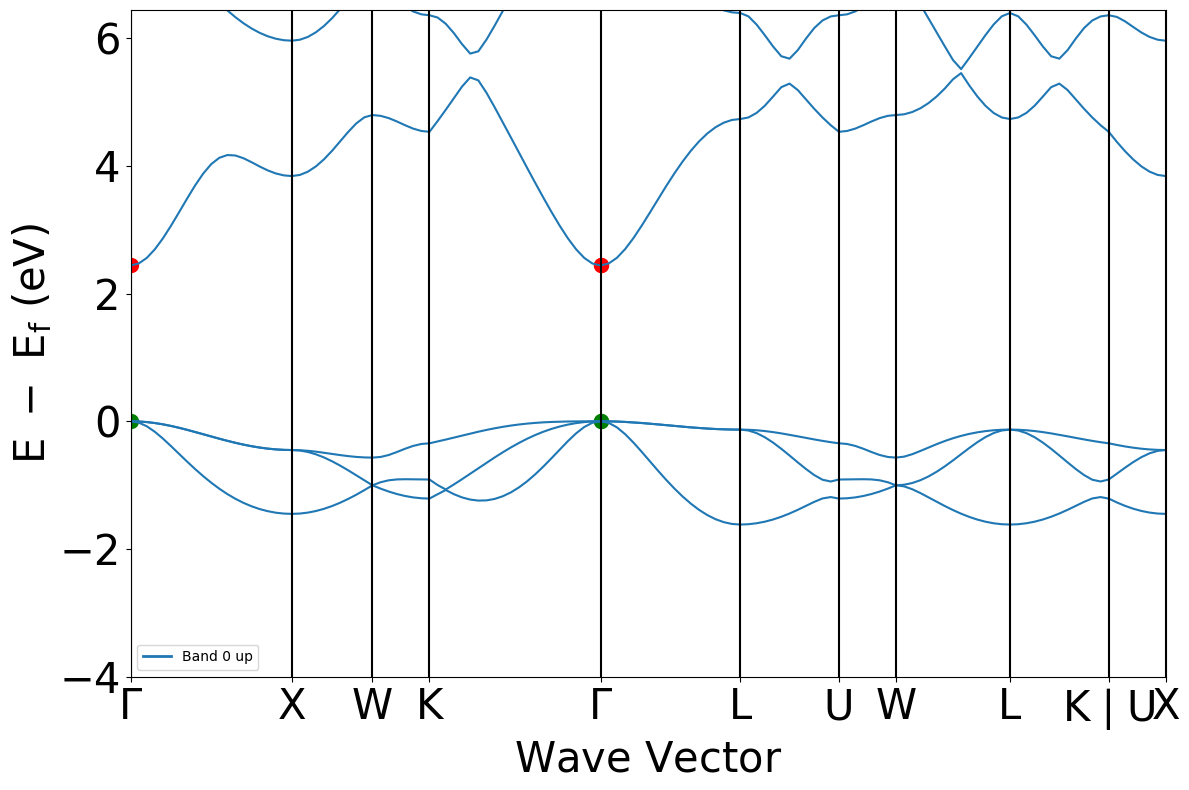

In [59]:
# Diagramme des bandes électroniques
Diag = BSPlotter(el_bs)
Diag.get_plot(vbm_cbm_marker=True)


# Bande interdite

In [60]:
# Bande interdite

b_int = el_bs.get_band_gap()
print(b_int)
print("\nLe saut de cette bande interdite est déterminé par l'énergie de transition qui vaut alors " + str(b_int['energy']) + " eV. Il s'agit de l'énergie nécessaire qui doit être fournie à l'électron pour qu'il puisse voyager de la bande de valence vers la bande de conduction. Ou, a contrario, l'énergie qui doit lui être soustraite pour repartir vers la bande de valence. \n")
print("De plus, on observe bien sur la représentation qu'il s'agit d'une transition directe. En effet le vecteur d'onde évolue selon une direction Γ−Γ.")
print("\n En outre, le point rouge représente le Conduction Band Minimum (CBM) et les points verts représentent le Valence Band Maximum (VBM).")



{'direct': True, 'energy': 2.4399, 'transition': '\\Gamma-\\Gamma'}

Le saut de cette bande interdite est déterminé par l'énergie de transition qui vaut alors 2.4399 eV. Il s'agit de l'énergie nécessaire qui doit être fournie à l'électron pour qu'il puisse voyager de la bande de valence vers la bande de conduction. Ou, a contrario, l'énergie qui doit lui être soustraite pour repartir vers la bande de valence. 

De plus, on observe bien sur la représentation qu'il s'agit d'une transition directe. En effet le vecteur d'onde évolue selon une direction Γ−Γ.

 En outre, le point rouge représente le Conduction Band Minimum (CBM) et les points verts représentent le Valence Band Maximum (VBM).


# Dispersion des électrons 


In [61]:
print("La dispersion des électrons est maximal pour une bande électronique où la pente de sa courbe est la plus élevée. Et elle est minimal là ou la pente de la courbe est la plus douce.")
print("\n")
vbm = el_bs.get_vbm()
cbm = el_bs.get_cbm()



print("Les bandes énergétiques qui contiennent le vbm sont :",vbm.get('band_index'))
print("Les bandes énergétiques qui contiennent le cbm sont :", cbm.get('band_index'))

print("\nLa dernière bande de valence est celle d'index 9, tandis que la première bande de conduction est celle d'index 10. \n")

print("Energie du vbm :", vbm.get('energy'), " eV")
print("Energie du cbm :", cbm.get('energy'), " eV")


La dispersion des électrons est maximal pour une bande électronique où la pente de sa courbe est la plus élevée. Et elle est minimal là ou la pente de la courbe est la plus douce.


Les bandes énergétiques qui contiennent le vbm sont : defaultdict(<class 'list'>, {<Spin.up: 1>: [7, 8, 9]})
Les bandes énergétiques qui contiennent le cbm sont : defaultdict(<class 'list'>, {<Spin.up: 1>: [10]})

La dernière bande de valence est celle d'index 9, tandis que la première bande de conduction est celle d'index 10. 

Energie du vbm : 0.271  eV
Energie du cbm : 2.7109  eV


indices 6 4 4 7


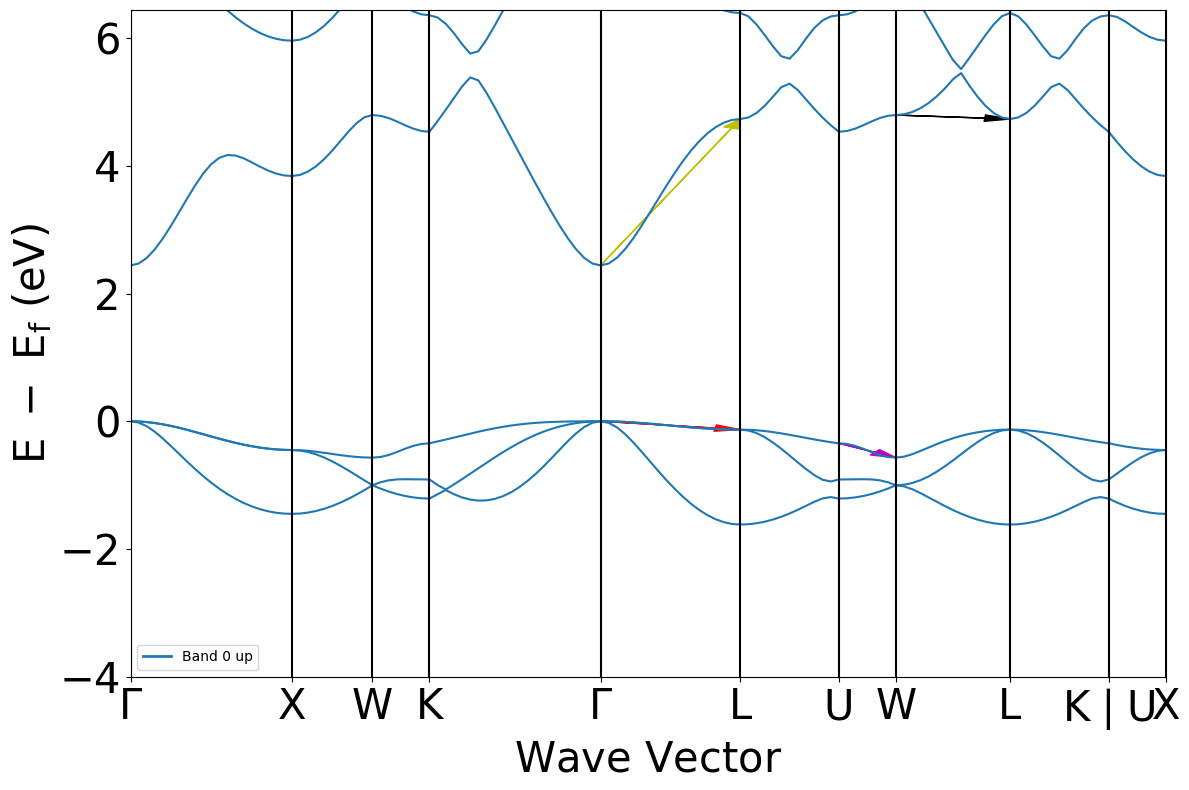

La plus grande pente de la dernière bande de valence vaut  0.6625992737094867
La plus grande pente de la première bande de conduction vaut  2.768812105294225
La plus petite pente de la dernière bande de valence vaut  0.15735180448353
La plus petite pente de la première bande de conduction vaut  0.09229061312382027


In [62]:
data = BSPlotter(el_bs).bs_plot_data()
y = data.get('energy')
x_ = data.get('ticks').get('distance')
x = [] 
for i in range(len(x_)):
    if (x_[i] not in x) : 
        x.append(x_[i])

dx = []
for i in range(1, len(x)) :
    dx.append(x[i]-x[i-1])

dy_bc = []
dy_bv = []
#print(len(y.get('1'))) --> 10
for i in range(10):
    dy_bv.append(y.get('1')[i][9][-1] - y.get('1')[i][9][0])
    dy_bc.append(y.get('1')[i][10][-1] - y.get('1')[i][10][0])

slopes_bc = np.array(dy_bc)/np.array(dx)
slopes_bv = np.array(dy_bv)/np.array(dx)

slopes_bc_abs = np.abs(slopes_bc)
slopes_bv_abs = np.abs(slopes_bv)


print("indices", list(slopes_bv_abs).index(max(slopes_bv_abs)), list(slopes_bc_abs).index(max(slopes_bc_abs)), list(slopes_bv_abs).index(min(slopes_bv_abs)), list(slopes_bc_abs).index(min(slopes_bc_abs)))
# 6, 4, 4, 7

BSPlotter(el_bs).get_plot()
plt.arrow(x[6], (y.get('1')[6][9])[0], dx[6], dy_bv[6], color = 'm', head_width = 0.1, length_includes_head=True)
plt.arrow(x[4], (y.get('1')[4][10])[0], dx[4], dy_bc[4], color = 'y', head_width = 0.1,length_includes_head=True)
plt.arrow(x[4], (y.get('1')[4][9])[0], dx[4], dy_bv[4], color = 'r', head_width = 0.1,length_includes_head=True)
plt.arrow(x[7], (y.get('1')[7][10])[0], dx[7], dy_bc[7], color = 'k', head_width = 0.1,length_includes_head=True)



plt.show()


max_slopes_bv = np.max(abs(slopes_bv))
print("La plus grande pente de la dernière bande de valence vaut ", max_slopes_bv)
max_slopes_bc = np.max(abs(slopes_bc))
print("La plus grande pente de la première bande de conduction vaut ", max_slopes_bc)
min_slopes_bv = np.min(abs(slopes_bv))
print("La plus petite pente de la dernière bande de valence vaut ", min_slopes_bv)
min_slopes_bc = np.min(abs(slopes_bc))
print("La plus petite pente de la première bande de conduction vaut ", min_slopes_bc)


Pour la dernière bande valence, la direction $U-W$ présente la plus grande dispersion tandis que la direction $\Gamma-L$ le moins de dispersion.

Pour la première bande conduction, la direction $\Gamma-L$ présente la plus grande dispersion tandis que la direction $W-L$ le moins de dispersion.

# Masse effective
Comme vu au cours on a que :
$$
  \frac{1}{m^*} = (\frac{1}{\hbar^2}\frac{d^2}{dk^2}(E))
$$

Dès lors on peut retrouver la masse effective si on prend en compte l'hypothèse d'une dispersion parabolique. Pour ce faire, il suffit d'utiliser polyfit de numpy pour approximer les coefficients de la parabole.

bande de conduction
La masse effective à la base de la première bande de conduction est  2.709654983296014e-31 kg


bande de valence
La masse effective au sommet de la dernière bande de valence est  -9.654042912913173e-30 kg


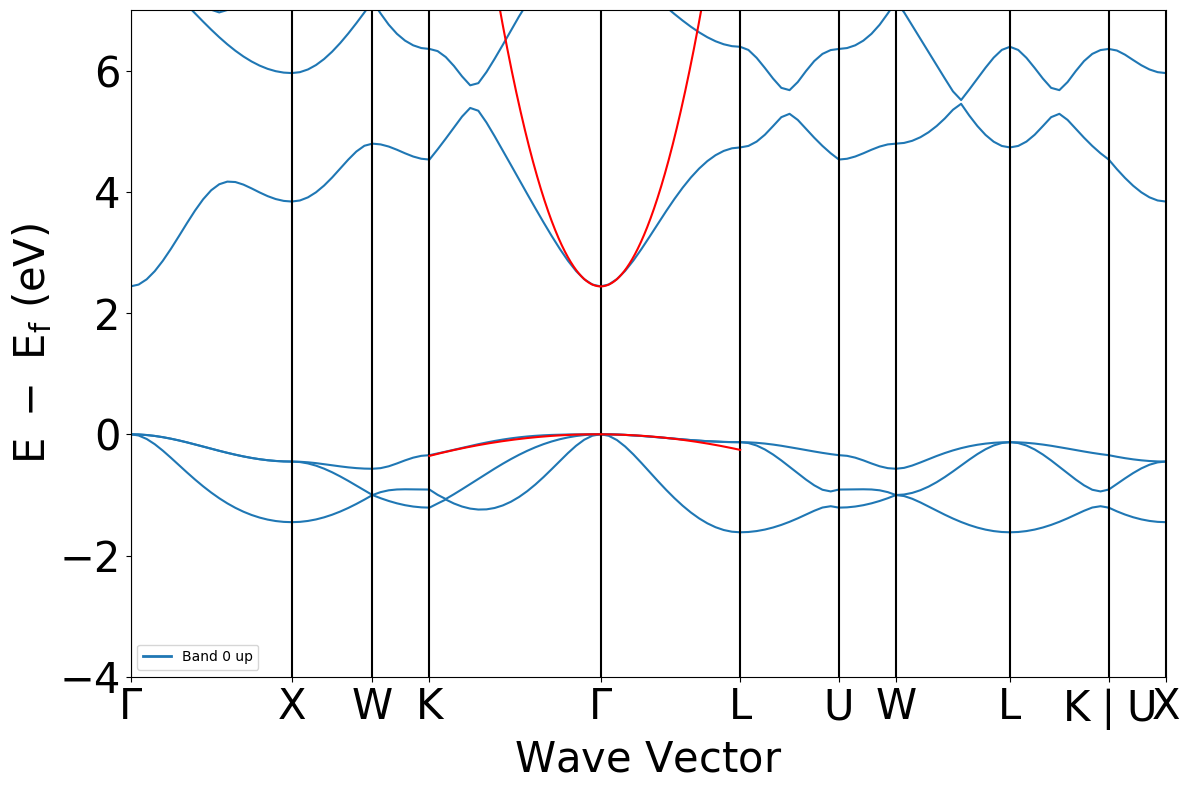

In [63]:
BSPlotter(el_bs).get_plot(ylim=[-4,7])

hbar = ((6.62607004*10**(-34))/(2*np.pi))
EV = 1.602176634*10**(-19)
A = 10**(-10) 

#Bande de conduction
k_bc = np.zeros(3)
E_bc = np.zeros(3)

k_bc[1] = data['cbm'][1][0]
E_bc[1] = data['cbm'][1][1]

k_bc[0] = (data['distances'][3][-2],data["energy"]['1'][3][10][-2])[0]
E_bc[0] = (data['distances'][3][-2],data["energy"]['1'][3][10][-2])[1]

k_bc[2] = (data['distances'][4][2],data["energy"]['1'][4][10][2])[0]
E_bc[2] = (data['distances'][4][2],data["energy"]['1'][4][10][2])[1]

fit_bc = np.polyfit(k_bc,E_bc,2)

print("bande de conduction")
print("La masse effective à la base de la première bande de conduction est ",str(hbar**2/(2*fit_bc[0]*EV*(A)**2))+" kg")

x = np.linspace(data['distances'][3][0],data['distances'][4][-1],1000)
plt.plot(x_bc,np.polyval(fit_bc,x),'r')


print("\n")

#Bande de valence
k_bv = np.zeros(3)
E_bv = np.zeros(3)

k_bv[1] = data['vbm'][1][0]
E_bv[1] = data['vbm'][1][1]

k_bv[0] = (data['distances'][3][-2],data["energy"]['1'][3][9][-2])[0]
E_bv[0] = (data['distances'][3][-2],data["energy"]['1'][3][9][-2])[1]

k_bv[2] = (data['distances'][4][2],data["energy"]['1'][4][9][2])[0]
E_bv[2] = (data['distances'][4][2],data["energy"]['1'][4][9][2])[1]

fit_bv = np.polyfit(k_bv,E_bv,2)

print("bande de valence")
print("La masse effective au sommet de la dernière bande de valence est ",str(hbar**2/(2*fit_bv[0]*EV*(A)**2))+" kg")


plt.plot(x,np.polyval(fit_bv,x),'r')


plt.show()
